Libraries 

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import os 
from graphviz import Source
from pydotplus import graph_from_dot_data
from IPython.display import Image

Upload csv file

In [ ]:
from google.colab import files

uploades = files.upload()

Saving TEST 0.csv to TEST 0.csv


Reading data 

In [ ]:
df= pd.read_csv('TEST 0.csv', sep=';')

In [ ]:
df.head()

,estu_consecutivo.1,estu_exterior,periodo,estu_tieneetnia,estu_tomo_cursopreparacion,estu_cursodocentesies,estu_cursoiesapoyoexterno,estu_cursoiesexterna,estu_simulacrotipoicfes,estu_actividadrefuerzoareas,estu_actividadrefuerzogeneric,fami_trabajolaborpadre,fami_trabajolabormadre,fami_numlibros,estu_inst_cod_departamento,estu_tipodocumento.1,estu_nacionalidad.1,estu_genero.1,estu_fechanacimiento.1,periodo.1,estu_estudiante.1,estu_pais_reside.1,estu_depto_reside.1,estu_cod_reside_depto.1,estu_mcpio_reside.1,estu_cod_reside_mcpio.1,estu_areareside,estu_valorpensioncolegio,fami_educacionpadre.1,fami_educacionmadre.1,fami_ocupacionpadre.1,fami_ocupacionmadre.1,fami_estratovivienda.1,fami_nivelsisben,fami_pisoshogar,fami_tieneinternet.1,fami_tienecomputador.1,fami_tienemicroondas,fami_tienehorno,fami_tieneautomovil.1,fami_tienedvd,fami_tiene_nevera.1,fami_tiene_celular.1,fami_telefono.1,fami_ingresofmiliarmensual,estu_trabajaactualmente,estu_antecedentes,estu_expectativas,cole_codigo_icfes,cole_cod_dane_establecimiento,cole_nombre_establecimiento,cole_genero,cole_naturaleza,cole_calendario,cole_bilingue,cole_caracter,cole_cod_dane_sede,cole_nombre_sede,cole_sede_principal,cole_area_ubicacion,cole_jornada,cole_cod_mcpio_ubicacion,cole_mcpio_ubicacion,cole_cod_depto_ubicacion,cole_depto_ubicacion,punt_lenguaje,punt_matematicas,punt_biologia,punt_quimica,punt_fisica,punt_ciencias_sociales,punt_filosofia,punt_ingles,desemp_ingles,profundiza,puntaje_prof,desemp_prof,exito
0,SB11201320218705,NO,20183,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Es dueño de un negocio grande, tiene un cargo ...","Es dueño de un negocio grande, tiene un cargo ...",26 A 100 LIBROS,11,TI,COLOMBIA,M,10/10/1996,20132,ESTUDIANTE,COLOMBIA,BOGOTA,11.0,BOGOTÁ D.C.,11001.0,Cabecera Municipal,250.000 o más,Secundaria (Bachillerato) completa,Educación profesional completa,Trabajador por cuenta propia,Empleado de nivel técnico o profesional,Estrato 3,Nivel 3,"Madera pulida, baldosa, tableta, mármol, alfombra",Si,Si,Si,No,Si,Si,Si,Si,Si,Entre 5 y menos de 7 SMLV,No,No,No,19794.0,3.110010e+11,COL AMERICANO DE BOGOTA ...,MIXTO,NO OFICIAL,A,N,ACADÉMICO,3.110010e+11,COL AMERICANO DE BOGOTA,S,URBANO,COMPLETA,11001.0,"BOGOTÁ, D.C.",11.0,BOGOTA,45.0,47.0,45.0,41.0,37.0,46.0,40.0,56.0,A2,PUNT_PROFUNDIZA_MATEMATICA,6.0,II,0
1,SB11201220483104,NO,20183,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Es agricultor, pesquero o jornalero","Trabaja en el hogar, no trabaja o estudia",0 A 10 LIBROS,76,TI,COLOMBIA,F,07/06/1995,20122,ESTUDIANTE,COLOMBIA,CUNDINAMARCA,25.0,SOACHA,25754.0,Cabecera Municipal,No paga Pensión,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Empleado obrero u operario,Hogar,Estrato 2,Nivel 3,"Madera pulida, baldosa, tableta, mármol, alfombra",Si,Si,Si,Si,Si,Si,Si,Si,Si,Entre 2 y menos de 3 SMLV,No,No,NaN,109843.0,1.257540e+11,INSTITUCION EDUCATIVA EL BOSQUE,MIXTO,OFICIAL,A,N,ACADÉMICO,1.257540e+11,INSTITUCION EDUCATIVA EL BOSQUE,S,URBANO,TARDE,25754.0,SOACHA,25.0,CUNDINAMARCA,33.0,35.0,41.0,46.0,47.0,40.0,34.0,42.0,A-,PUNT_INTERDISC_VIOLENCIAYSOC,41.0,NaN,0
2,SB11201320115727,NaN,20152,NaN,No,No tomó Curso,No tomó Curso,No tomó curso,No,No,No,NaN,NaN,NaN,11,TI,COLOMBIA,M,01/08/1996,20132,ESTUDIANTE,COLOMBIA,CUNDINAMARCA,25.0,SIBATÉ,25740.0,Area Rural,No paga Pensión,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Otra actividad u ocupación,Hogar,Estrato 2,Nivel 2,"Cemento, gravilla, ladrillo",No,Si,No,No,No,Si,Si,Si,Si,Menos de 1 SMLV,No,No,Si,126771.0,1.257400e+11,INSTITUCION EDUCATIVA DEPARTAMENTAL PABLO NERUDA,MIXTO,OFICIAL,A,NaN,ACADÉMICO,1.257400e+11,COMPLEJO EDUCATIVO PABLO NERUDA,N,URBANO,COMPLETA,25740.0,SIBATÉ,25.0,CUNDINAMARCA,38.0,49.0,46.0,53.0,41.0,44.0,45.0,45.0,A1,PUNT_INTERDISC_MEDIOAMBIENTE,51.0,NaN,0
3,SB11201210035597,NO,20173,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26 A 100 LIBROS,76,TI,COLOMBIA,F,17/01/1996,20121,ESTUDIANTE,COLOMBIA,VALLE,76.0,CALI,76001.0,Cabecera Municipal,250.000 o más,Postgrado,Postgrado,Pensionado,Emplea

In [ ]:
df.shape
#data frame data quantity

(5000, 78)

In [ ]:
df.exito.replace({0:"Sin exito", 1:"Con exito"}, inplace=True)

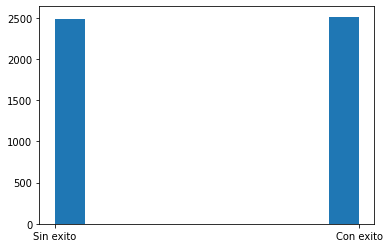

In [ ]:
#success cases and graphic
plt.hist(df.exito)
plt.show()

In [ ]:
df.exito.unique()

array(['Sin exito', 'Con exito'], dtype=object)

In [ ]:
colnames = df.columns.values.tolist()
colnames

['estu_consecutivo.1',
 'estu_exterior',
 'periodo',
 'estu_tieneetnia',
 'estu_tomo_cursopreparacion',
 'estu_cursodocentesies',
 'estu_cursoiesapoyoexterno',
 'estu_cursoiesexterna',
 'estu_simulacrotipoicfes',
 'estu_actividadrefuerzoareas',
 'estu_actividadrefuerzogeneric',
 'fami_trabajolaborpadre',
 'fami_trabajolabormadre',
 'fami_numlibros',
 'estu_inst_cod_departamento',
 'estu_tipodocumento.1',
 'estu_nacionalidad.1',
 'estu_genero.1',
 'estu_fechanacimiento.1',
 'periodo.1',
 'estu_estudiante.1',
 'estu_pais_reside.1',
 'estu_depto_reside.1',
 'estu_cod_reside_depto.1',
 'estu_mcpio_reside.1',
 'estu_cod_reside_mcpio.1',
 'estu_areareside',
 'estu_valorpensioncolegio',
 'fami_educacionpadre.1',
 'fami_educacionmadre.1',
 'fami_ocupacionpadre.1',
 'fami_ocupacionmadre.1',
 'fami_estratovivienda.1',
 'fami_nivelsisben',
 'fami_pisoshogar',
 'fami_tieneinternet.1',
 'fami_tienecomputador.1',
 'fami_tienemicroondas',
 'fami_tienehorno',
 'fami_tieneautomovil.1',
 'fami_tienedvd'

In [ ]:
#variable-> success
#predictors -> score
target = colnames[-1]
predictors = colnames [65:73]
predictors

['punt_lenguaje',
 'punt_matematicas',
 'punt_biologia',
 'punt_quimica',
 'punt_fisica',
 'punt_ciencias_sociales',
 'punt_filosofia',
 'punt_ingles']

In [ ]:
df["train"]=np.random.uniform(0,1 , len(df))<=0.75
#validar -> 25%
#train -> 75%

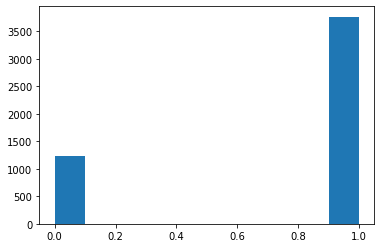

In [ ]:
plt.hist(df.train.astype(np.int))
plt.show()

In [ ]:
train,test=(df[df["train"]==True], df[df["train"]==False])

In [ ]:
arbol = DecisionTreeClassifier(criterion="gini", max_depth= 4,
                               min_samples_split=20, random_state=1)

In [ ]:
arbol.fit(train[predictors], train[target])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
preds = arbol.predict(test[predictors])

In [ ]:
pd.crosstab(test[target], preds)

col_0,Con exito,Sin exito
exito,,
Con exito,442,178
Sin exito,105,507


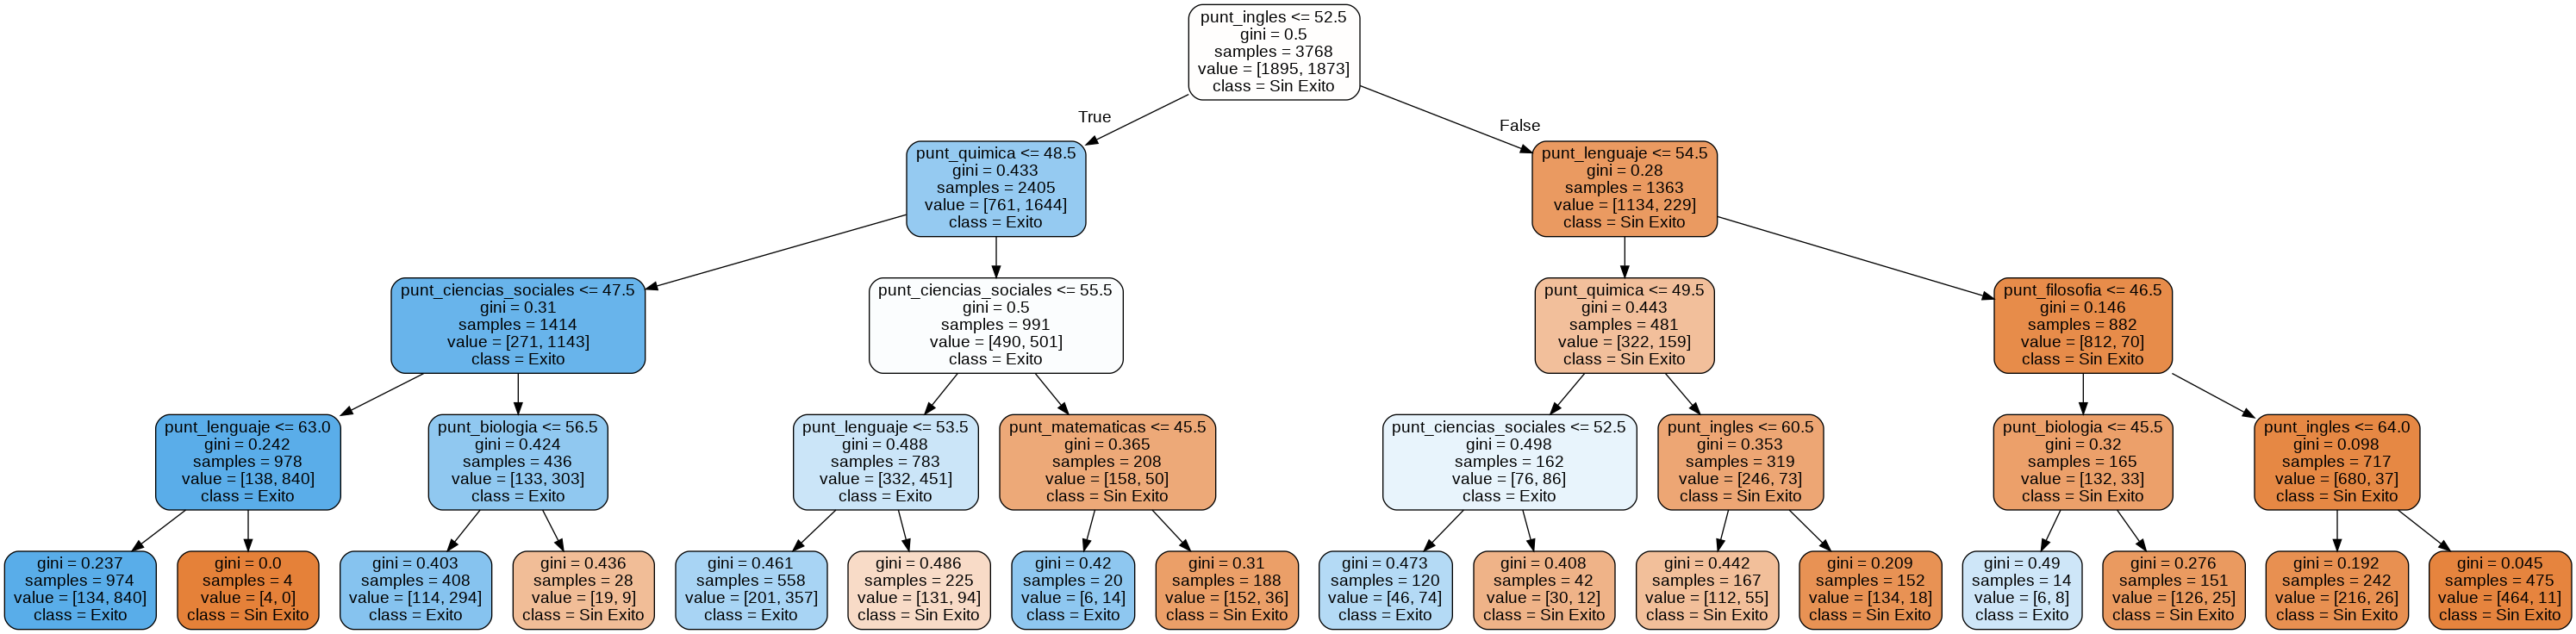

In [ ]:
dot_df = export_graphviz(arbol, out_file=None, 
                           filled=True, rounded=True, 
                           class_names=["Sin Exito", "Exito"], 
                           feature_names=predictors)
graph = graph_from_dot_data(dot_df)
graph.write_png("arbol.png")
Image(graph.create_png())